# **Customer value Segmentation Using RFM**

In [ ]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load the dataset
data = pd.read_excel('/content/drive/MyDrive/RetailStoreData.xlsx', sheet_name=None)  # Load both sheets
data = pd.concat(data.values(), ignore_index=True)  # Merge sheets into one DataFrame

# Display the first few rows of the data
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Display the first few rows of the concatenated DataFrame
data.shape
data.columns
data.info()

(1067371, 8)

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
print("missing value present in main dataset")
data.isnull().sum()


missing value present in main dataset


,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


**Copying the dataset to grab some insights from Null Cx ID**

In [ ]:
# Check for missing values
missing_data = data.copy()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Check for null Customer ID values
print(f"Total records with null Customer ID: {missing_data['Customer ID'].isnull().sum()}")

Total records with null Customer ID: 243007


In [ ]:
# Analyze null Customer ID records separately
null_customer_data = missing_data[missing_data['Customer ID'].isnull()]
print("Description of transactions with null Customer ID:")
null_customer_data.head()
null_customer_data.describe()

Description of transactions with null Customer ID:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


,Quantity,InvoiceDate,Price,Customer ID
count,243007.000000,243007,243007.000000,0.0
mean,1.540548,2011-01-06 02:22:37.837181440,7.948744,NaN
min,-9600.000000,2009-12-01 10:52:00,-53594.360000,NaN
25%,1.000000,2010-07-22 12:29:00,1.660000,NaN
50%,1.000000,2010-12-20 15:03:00,3.290000,NaN
75%,2.000000,2011-07-12 13:46:00,5.790000,NaN
max,10200.000000,2011-12-09 10:26:00,25111.090000,NaN
std,98.859370,NaN,224.275451,NaN


In [ ]:

# product purchased by null Customer ID transactions
print("Top products purchased by anonymous customers:")
null_customer_data['StockCode'].value_counts().head(10)

Top products purchased by anonymous customers:


,count
StockCode,
DOT,1430
85099B,770
22423,647
21212,639
21931,635
47566,624
22197,603
22379,573
22355,572


<ipython-input-47-57bfe73333ba>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filled_data['Customer ID'].fillna('Anonymous', inplace=True) #both filled and not filled
<ipython-input-47-57bfe73333ba>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Anonymous' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  filled_data['Customer ID'].fillna('Anonymous', inplace=True) #both filled and not filled


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='InvoiceDate', ylabel='Count'>

Text(0.5, 1.0, 'Transaction Distribution Over Time for Null Customer ID')

Text(0.5, 0, 'Invoice Date')

Text(0, 0.5, 'Transaction Count')

(array([14610., 14700., 14791., 14883., 14975., 15065., 15156., 15248.,
        15340.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14700.0, 0, '2010-04'),
  Text(14791.0, 0, '2010-07'),
  Text(14883.0, 0, '2010-10'),
  Text(14975.0, 0, '2011-01'),
  Text(15065.0, 0, '2011-04'),
  Text(15156.0, 0, '2011-07'),
  Text(15248.0, 0, '2011-10'),
  Text(15340.0, 0, '2012-01')])

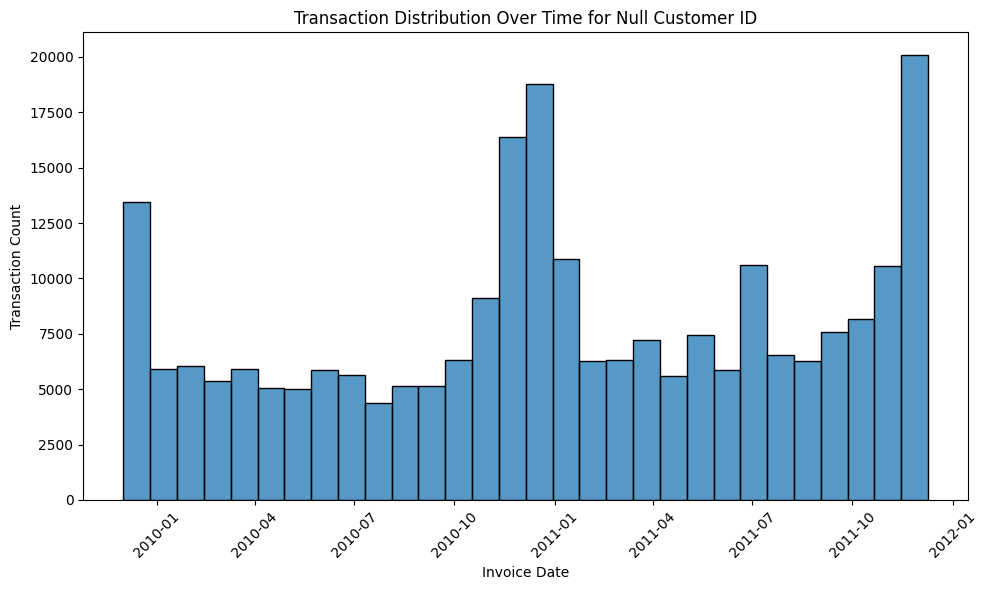

In [ ]:
# Option 2: Fill null Customer ID with a special identifier 'Anonymous'
filled_data = missing_data.copy()
filled_data['Customer ID'].fillna('Anonymous', inplace=True) #both filled and not filled

# Analysis of Customer ID null transactions' distribution across time

plt.figure(figsize=(10, 6))
sns.histplot(null_customer_data['InvoiceDate'], kde=False, bins=30)
plt.title('Transaction Distribution Over Time for Null Customer ID')
plt.xlabel('Invoice Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Revenue Contribution: Identified vs Anonymous Customers')

Text(0, 0.5, 'Revenue')

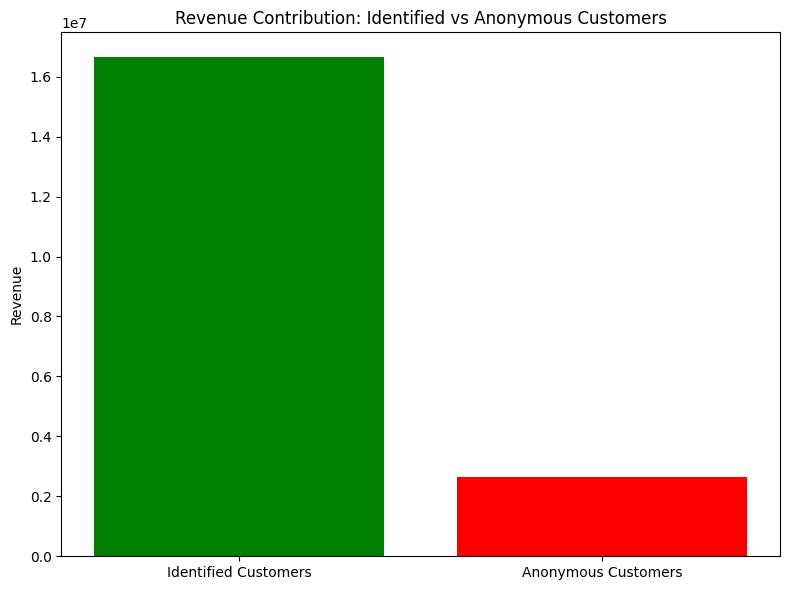

In [ ]:
# Option 1: Remove rows with null Customer ID (if customer-specific analysis is required)
data_cleaned = missing_data.dropna(subset=['Customer ID'])

# Compare revenue from identified vs anonymous customers
identified_customers = data_cleaned['Quantity'] * data_cleaned['Price'] #removed null
anonymous_customers = null_customer_data['Quantity'] * null_customer_data['Price']

plt.figure(figsize=(8, 6))
labels = ['Identified Customers', 'Anonymous Customers']
revenues = [identified_customers.sum(), anonymous_customers.sum()]
plt.bar(labels, revenues, color=['green', 'red'])
plt.title('Revenue Contribution: Identified vs Anonymous Customers')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# **Exploratory Data Analysis**

**Here Im dropping the null values of Cx Id for further operation**

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Drop rows where Customer ID is missing
data.dropna(subset=['Customer ID'], inplace=True)

# Check for missing values
data.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [ ]:
data.shape
data['Customer ID'].count()
data['Customer ID'].nunique()


(824364, 8)

824364

5942

In [ ]:

data = data[data['Quantity'] > 0]  # Remove negative or zero quantities (returns)
data = data[data['Price'] > 0]  # Remove zero or negative prices

# **Top 5 products by sales**

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='StockCode', ylabel='Revenue'>

Text(0.5, 1.0, 'Top 5 Products by Revenue')

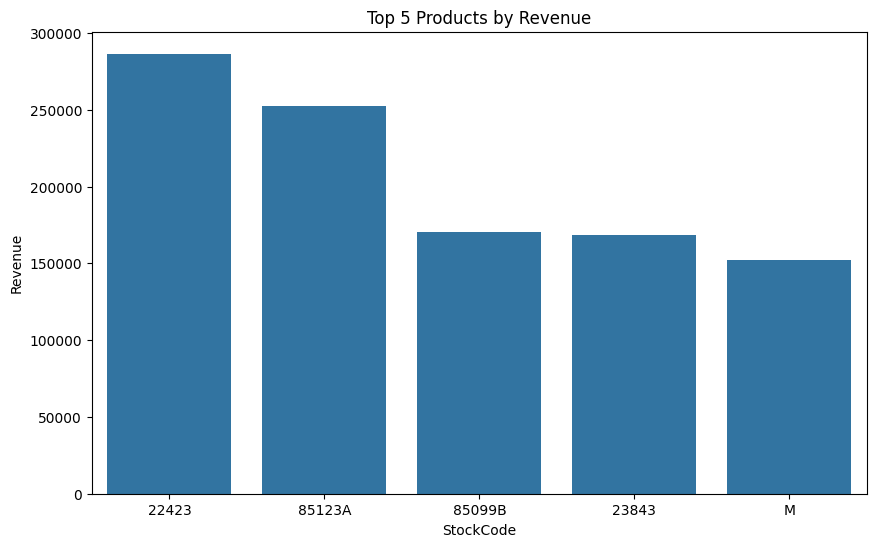

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Revenue column
data['Revenue'] = data['Quantity'] * data['Price']

# Group by StockCode to get product-level insights
product_sales = data.groupby('StockCode').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Top 5 products by sales
top_products = product_sales.sort_values(by='Revenue', ascending=False).head()

# Plot revenue distribution by product
plt.figure(figsize=(10, 6))
sns.barplot(x='StockCode', y='Revenue', data=top_products)
plt.title('Top 5 Products by Revenue')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Country', ylabel='Revenue'>

Text(0.5, 1.0, 'Country-wise Revenue')

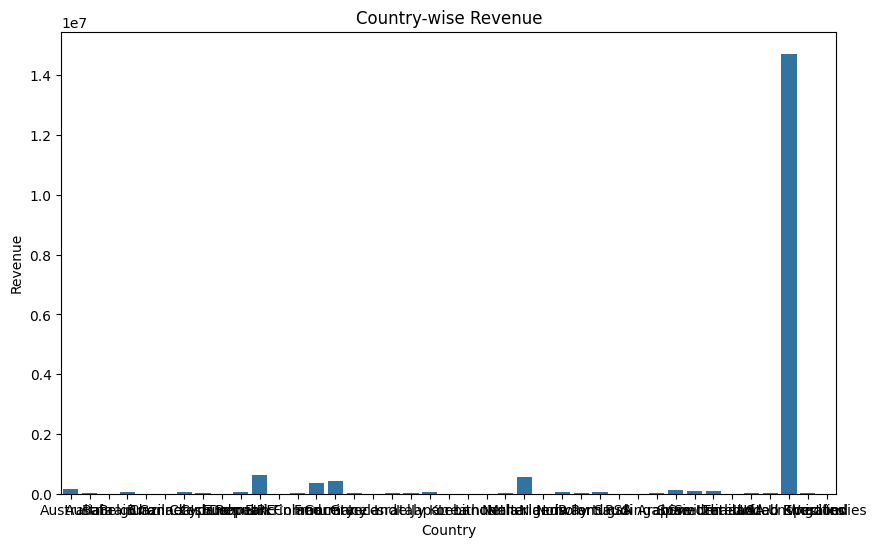

,0
Country,West Indies
Invoice,33541
Revenue,14723147.517


,0
Country,Australia
Invoice,1
Revenue,140.39


,Country,Invoice,Revenue
0,Australia,95,169968.11
1,Austria,45,23613.01
2,Bahrain,4,1354.37
3,Belgium,149,65753.42
4,Brazil,2,1411.87


In [ ]:
# Country-wise transactions
country_sales = data.groupby('Country').agg({
    'Invoice': 'nunique',
    'Revenue': 'sum'
}).reset_index()

# Plot country-wise revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Revenue', data=country_sales)
plt.title('Country-wise Revenue')
plt.show()

country_sales.max()
country_sales.min()
country_sales.head()

# **Exploring relationships within the dataset**

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

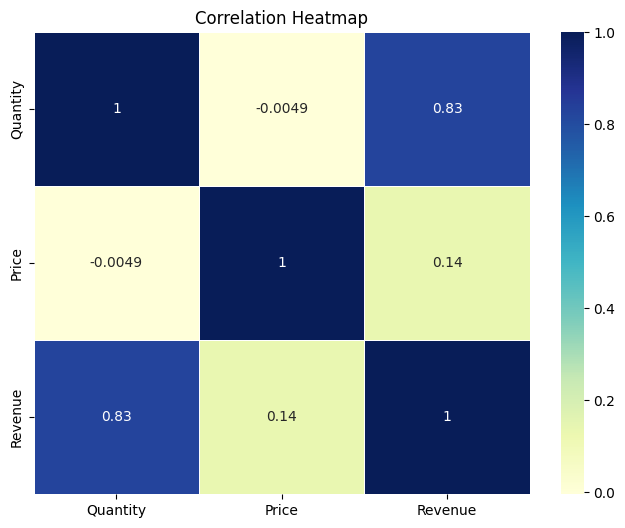

In [ ]:
# 1. Heatmap: Visualize correlations between numerical variables
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Quantity', 'Price', 'Revenue']].corr()

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


High multicollinearity (like between Quantity and Revenue) can negatively impact the logistic regression model, as it assumes independent features.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Quantity', ylabel='Price'>

Text(0.5, 1.0, 'Scatter Plot: Quantity vs Price')

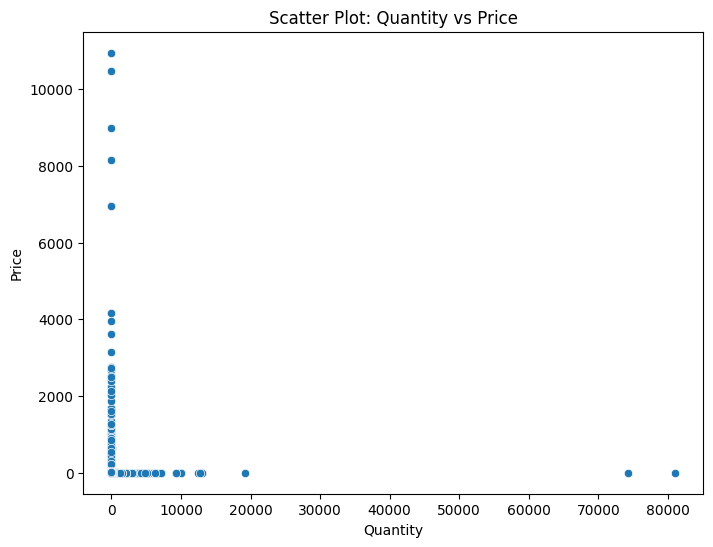

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Price', ylabel='Revenue'>

Text(0.5, 1.0, 'Scatter Plot: Price vs Revenue')

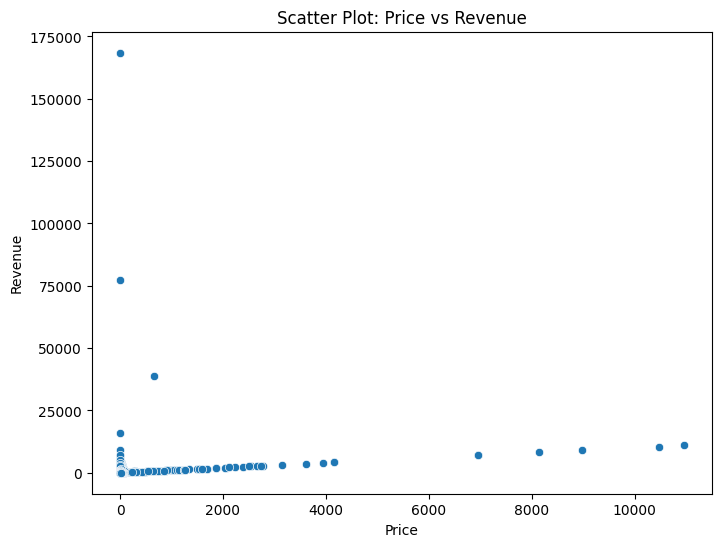

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Quantity', ylabel='Revenue'>

Text(0.5, 1.0, 'Scatter Plot: Quantity vs Revenue')

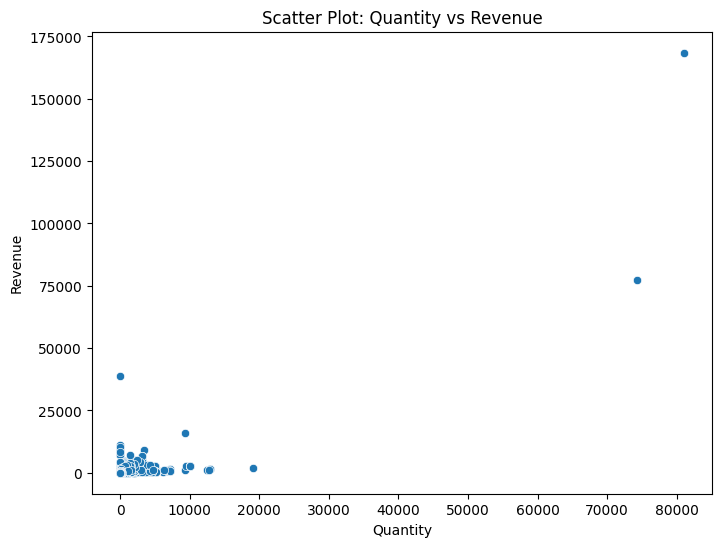

In [ ]:
# 2. Scatter Plot: Quantity vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Price', data=data)
plt.title('Scatter Plot: Quantity vs Price')
plt.show()

# 3. Scatter Plot: Price vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Revenue', data=data)
plt.title('Scatter Plot: Price vs Revenue')
plt.show()

# 4. Scatter Plot: Quantity vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Revenue', data=data)
plt.title('Scatter Plot: Quantity vs Revenue')
plt.show()

<Figure size 1400x600 with 0 Axes>

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Quantity'>

Text(0.5, 1.0, 'Quantity Box Plot, width=1.5, linewidth=2')

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Price'>

Text(0.5, 1.0, 'Unit Price Box Plot, width=1.5, linewidth=2')

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Revenue'>

Text(0.5, 1.0, 'Revenue Box Plot, width=1.5, linewidth=2')

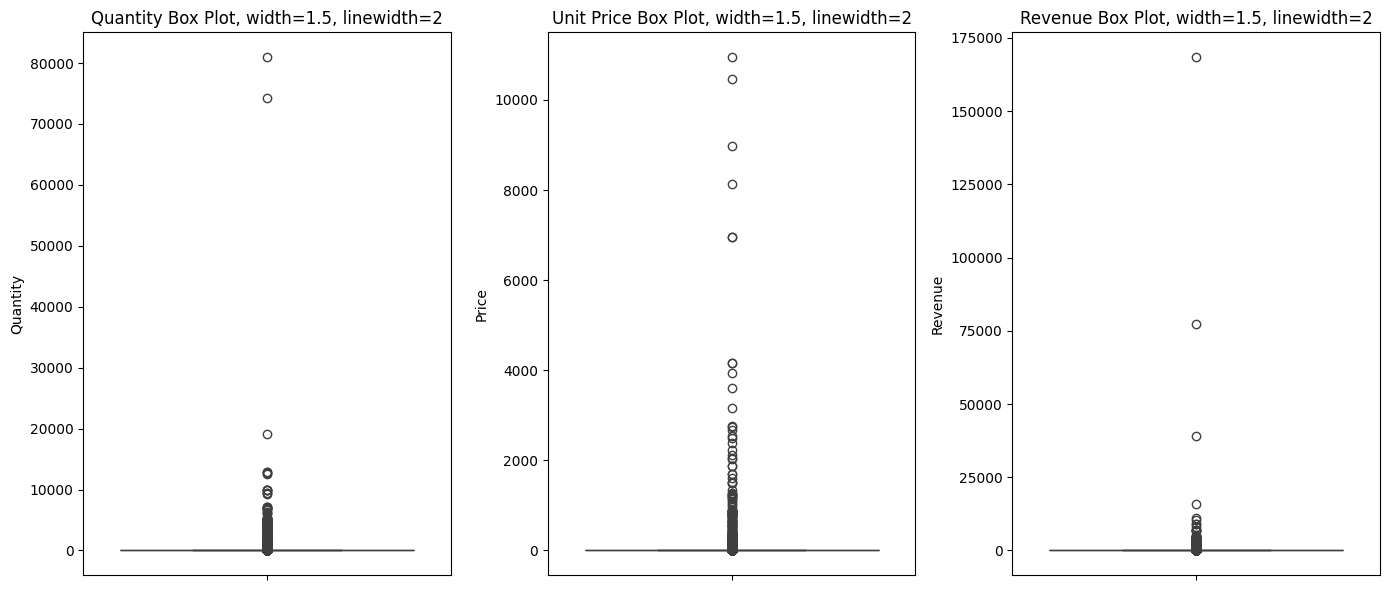

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box Plot, width=0., linewidth=2 for Quantity, UnitPrice, and Revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data['Quantity'])
plt.title('Quantity Box Plot, width=1.5, linewidth=2')

plt.subplot(1, 3, 2)
sns.boxplot(data['Price'])
plt.title('Unit Price Box Plot, width=1.5, linewidth=2')

plt.subplot(1, 3, 3)
sns.boxplot(data['Revenue'])
plt.title('Revenue Box Plot, width=1.5, linewidth=2')

plt.tight_layout()
plt.show()

# **Log Transformation**

In [ ]:
data[['Quantity', 'Price']] = np.log1p(data[['Quantity', 'Price']])
# Revenue column
data['Revenue'] = data['Quantity'] * data['Price']

data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2.564949,2009-12-01 07:45:00,2.073172,13085.0,United Kingdom,5.317581
1,489434,79323P,PINK CHERRY LIGHTS,2.564949,2009-12-01 07:45:00,2.047693,13085.0,United Kingdom,5.252228
2,489434,79323W,WHITE CHERRY LIGHTS,2.564949,2009-12-01 07:45:00,2.047693,13085.0,United Kingdom,5.252228
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",3.891820,2009-12-01 07:45:00,1.131402,13085.0,United Kingdom,4.403214
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,3.218876,2009-12-01 07:45:00,0.810930,13085.0,United Kingdom,2.610284


# **Plotting After Transformation of data**

<Figure size 1400x600 with 0 Axes>

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Quantity'>

Text(0.5, 1.0, 'Quantity Box Plot, width=1.5, linewidth=2')

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Price'>

Text(0.5, 1.0, 'Unit Price Box Plot, width=1.5, linewidth=2')

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Revenue'>

Text(0.5, 1.0, 'Revenue Box Plot, width=1.5, linewidth=2')

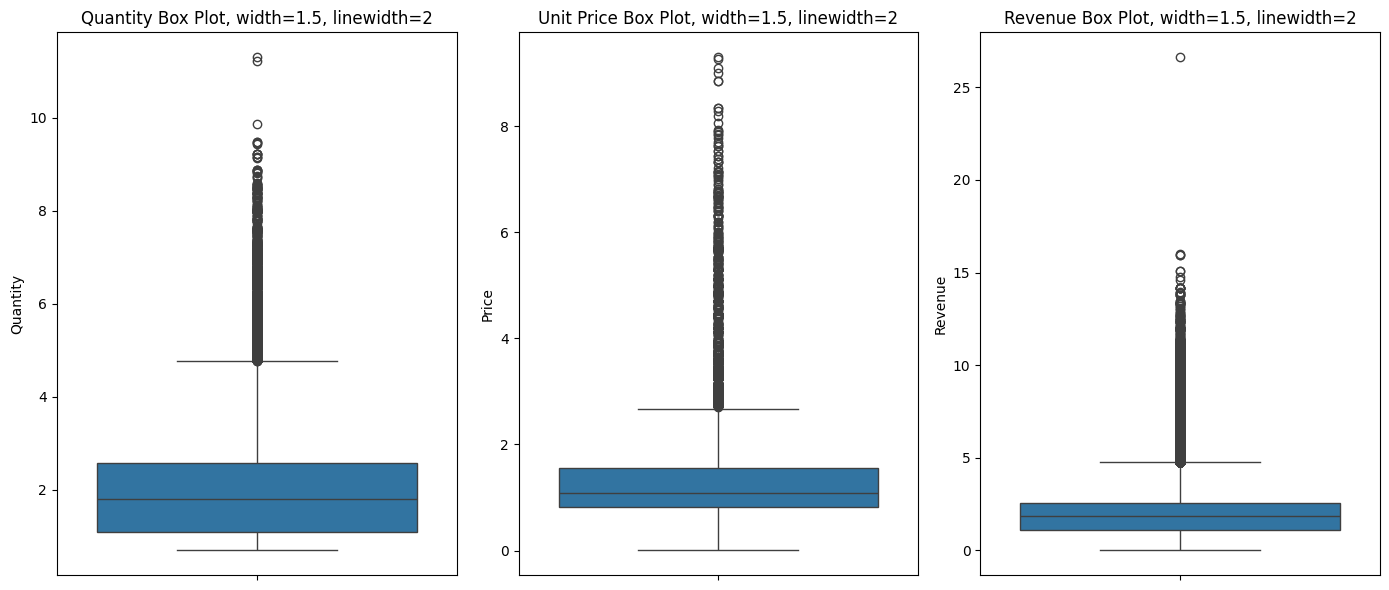

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box Plot, width=0., linewidth=2 for Quantity, UnitPrice, and Revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data['Quantity'])
plt.title('Quantity Box Plot, width=1.5, linewidth=2')

plt.subplot(1, 3, 2)
sns.boxplot(data['Price'])
plt.title('Unit Price Box Plot, width=1.5, linewidth=2')

plt.subplot(1, 3, 3)
sns.boxplot(data['Revenue'])
plt.title('Revenue Box Plot, width=1.5, linewidth=2')

plt.tight_layout()
plt.show()

<Axes: xlabel='Quantity', ylabel='Price'>

Text(0.5, 1.0, 'Scatter Plot: Quantity vs Price')

<Axes: xlabel='Price', ylabel='Revenue'>

Text(0.5, 1.0, 'Scatter Plot: Price vs Revenue')

<Axes: xlabel='Quantity', ylabel='Revenue'>

Text(0.5, 1.0, 'Scatter Plot: Quantity vs Revenue')

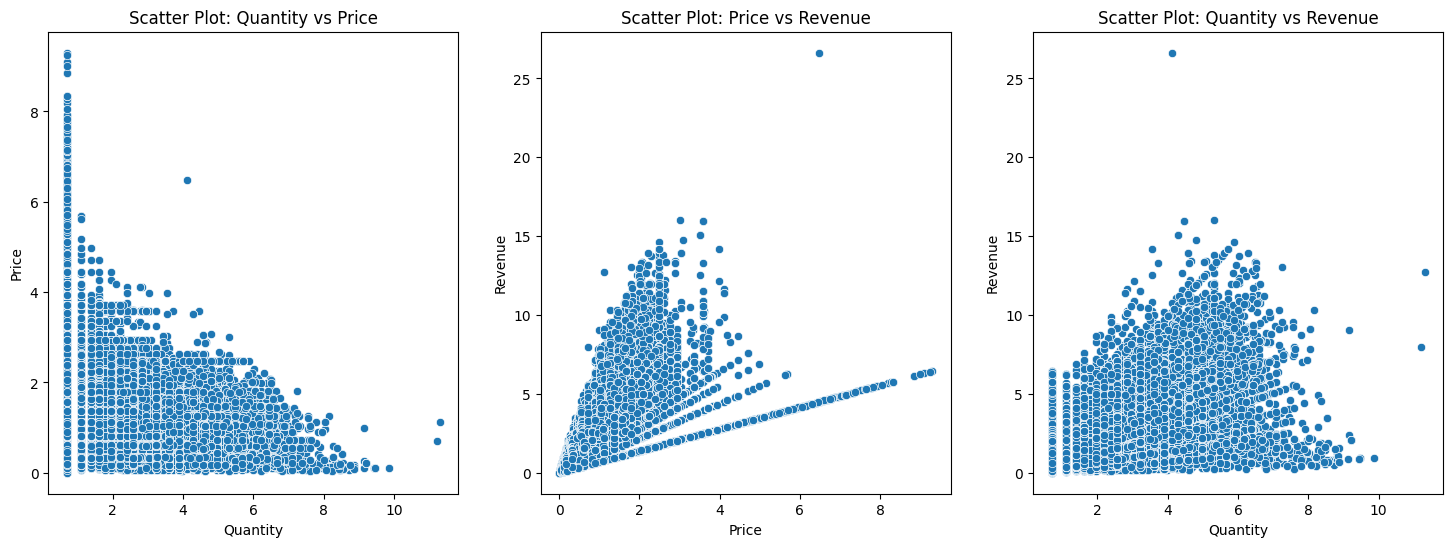

In [ ]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Scatter Plot: Quantity vs Price
sns.scatterplot(x='Quantity', y='Price', data=data, ax=axes[0])
axes[0].set_title('Scatter Plot: Quantity vs Price')

# 2. Scatter Plot: Price vs Revenue
sns.scatterplot(x='Price', y='Revenue', data=data, ax=axes[1])
axes[1].set_title('Scatter Plot: Price vs Revenue')

# 3. Scatter Plot: Quantity vs Revenue
sns.scatterplot(x='Quantity', y='Revenue', data=data, ax=axes[2])
axes[2].set_title('Scatter Plot: Quantity vs Revenue')

plt.show()


# **Removing Outliers using IQR Method**

In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[['Quantity', 'Price']].quantile(0.25)
Q3 = data[['Quantity', 'Price']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame, keeping only values within the bounds
data_cleaned = data[
    (data['Quantity'] >= lower_bound['Quantity']) & (data['Quantity'] <= upper_bound['Quantity']) &
    (data['Price'] >= lower_bound['Price']) & (data['Price'] <= upper_bound['Price'])
]

# Revenue column
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['Price']

# Show the result after outlier removal
data_cleaned.head()


<ipython-input-60-831c6bfb73c5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2.564949,2009-12-01 07:45:00,2.073172,13085.0,United Kingdom,5.317581
1,489434,79323P,PINK CHERRY LIGHTS,2.564949,2009-12-01 07:45:00,2.047693,13085.0,United Kingdom,5.252228
2,489434,79323W,WHITE CHERRY LIGHTS,2.564949,2009-12-01 07:45:00,2.047693,13085.0,United Kingdom,5.252228
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",3.891820,2009-12-01 07:45:00,1.131402,13085.0,United Kingdom,4.403214
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,3.218876,2009-12-01 07:45:00,0.810930,13085.0,United Kingdom,2.610284


# **Plotting After Removing outliers**

<Figure size 1400x600 with 0 Axes>

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Quantity'>

Text(0.5, 1.0, 'Quantity Box Plot, width=1.5, linewidth=2')

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Price'>

Text(0.5, 1.0, 'Unit Price Box Plot, width=1.5, linewidth=2')

<Axes: >

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Revenue'>

Text(0.5, 1.0, 'Revenue Box Plot, width=1.5, linewidth=2')

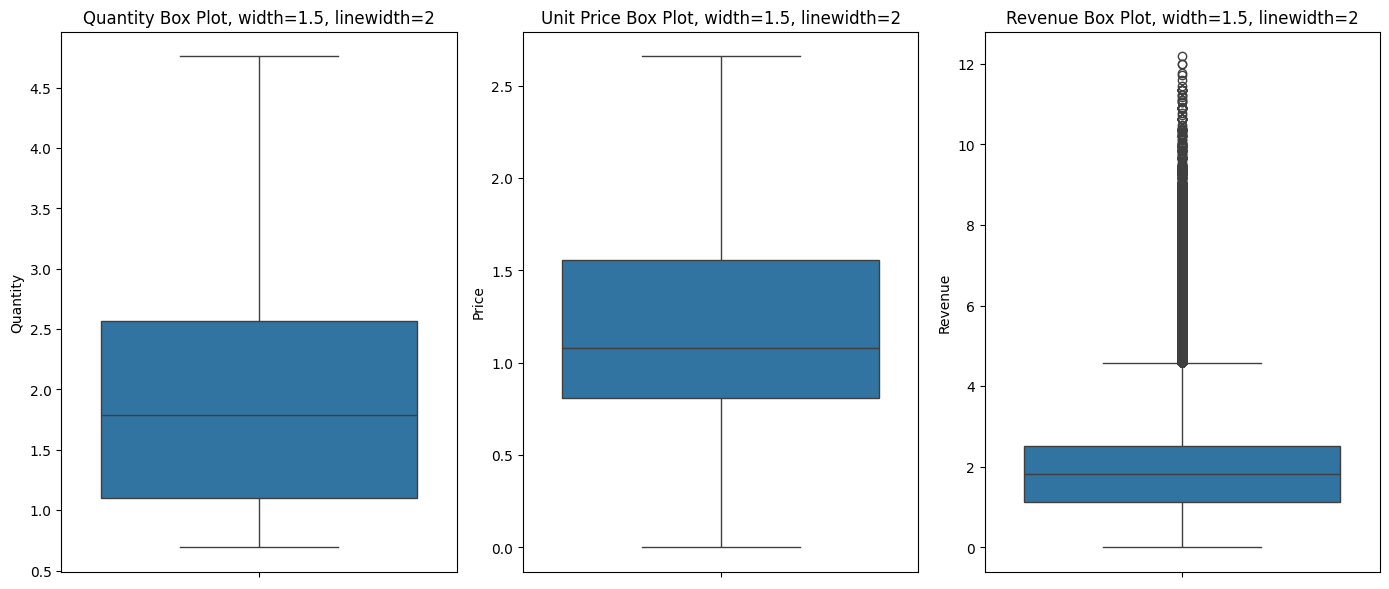

In [ ]:

# Box Plot, width=0., linewidth=2 for Quantity, UnitPrice, and Revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data_cleaned['Quantity'])
plt.title('Quantity Box Plot, width=1.5, linewidth=2')

plt.subplot(1, 3, 2)
sns.boxplot(data_cleaned['Price'])
plt.title('Unit Price Box Plot, width=1.5, linewidth=2')

plt.subplot(1, 3, 3)
sns.boxplot(data_cleaned['Revenue'])
plt.title('Revenue Box Plot, width=1.5, linewidth=2')

plt.tight_layout()
plt.show()

<Axes: xlabel='Quantity', ylabel='Price'>

Text(0.5, 1.0, 'Scatter Plot: Quantity vs Price')

<Axes: xlabel='Price', ylabel='Revenue'>

Text(0.5, 1.0, 'Scatter Plot: Price vs Revenue')

<Axes: xlabel='Quantity', ylabel='Revenue'>

Text(0.5, 1.0, 'Scatter Plot: Quantity vs Revenue')

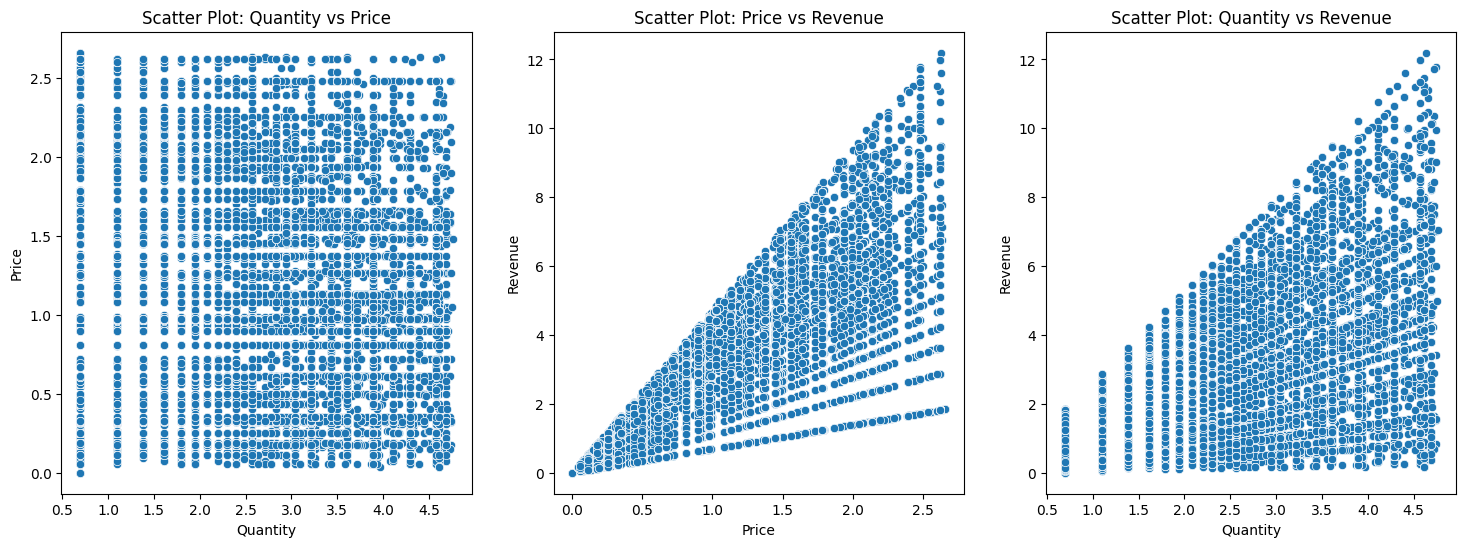

In [ ]:
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Scatter Plot: Quantity vs Price
sns.scatterplot(x='Quantity', y='Price', data=data_cleaned, ax=axes[0])
axes[0].set_title('Scatter Plot: Quantity vs Price')

# 2. Scatter Plot: Price vs Revenue
sns.scatterplot(x='Price', y='Revenue', data=data_cleaned, ax=axes[1])
axes[1].set_title('Scatter Plot: Price vs Revenue')

# 3. Scatter Plot: Quantity vs Revenue
sns.scatterplot(x='Quantity', y='Revenue', data=data_cleaned, ax=axes[2])
axes[2].set_title('Scatter Plot: Quantity vs Revenue')

plt.show()


**Feature Creation for Revenue Segments**

**Create revenue metrics over different time periods (LMR, TMR, SMR, TMR, LTR)**

In [ ]:
# Set the reference date as the last date in the dataset
reference_date = data_cleaned['InvoiceDate'].max()

# Display reference date
print(reference_date)


2011-12-09 12:50:00


**Calculate Revenue for Different Time Periods**

In [ ]:
# Filter and calculate revenue for different time periods (1, 3, 6, 12 months)

# Last Month Revenue (LMR)
lmr = data_cleaned[data_cleaned['InvoiceDate'] >= (reference_date - pd.DateOffset(months=1))].groupby('Customer ID')['Revenue'].sum().reset_index()
lmr.columns = ['Customer ID', 'LastMonthRevenue']

# Three Months Revenue (TMR)
tmr = data_cleaned[data_cleaned['InvoiceDate'] >= (reference_date - pd.DateOffset(months=3))].groupby('Customer ID')['Revenue'].sum().reset_index()
tmr.columns = ['Customer ID', 'ThreeMonthsRevenue']

# Six Months Revenue (SMR)
smr = data_cleaned[data_cleaned['InvoiceDate'] >= (reference_date - pd.DateOffset(months=6))].groupby('Customer ID')['Revenue'].sum().reset_index()
smr.columns = ['Customer ID', 'SixMonthsRevenue']

# Twelve Months Revenue (TMR)
tmr_12 = data_cleaned[data_cleaned['InvoiceDate'] >= (reference_date - pd.DateOffset(months=12))].groupby('Customer ID')['Revenue'].sum().reset_index()
tmr_12.columns = ['Customer ID', 'TwelveMonthsRevenue']

# LifeTime Revenue (LTR)
ltr = data_cleaned.groupby('Customer ID')['Revenue'].sum().reset_index()
ltr.columns = ['Customer ID', 'LifeTimeRevenue']

# Merge all the revenue metrics into a single dataframe
customer_revenue = lmr.merge(tmr, on='Customer ID', how='left')\
                      .merge(smr, on='Customer ID', how='left')\
                      .merge(tmr_12, on='Customer ID', how='left')\
                      .merge(ltr, on='Customer ID', how='left')

# Check the merged dataframe
customer_revenue.head()


,Customer ID,LastMonthRevenue,ThreeMonthsRevenue,SixMonthsRevenue,TwelveMonthsRevenue,LifeTimeRevenue
0,12347.0,23.614857,151.760027,256.869362,373.249515,623.970015
1,12349.0,173.344297,173.344297,173.344297,173.344297,420.597358
2,12356.0,6.318529,6.318529,6.318529,167.997129,371.526028
3,12358.0,25.943557,25.943557,62.812560,62.812560,231.505416
4,12362.0,69.238157,388.310810,484.634890,611.590064,611.590064


**RFM Analysis**

In [ ]:
# Recency (days since the last purchase), Frequency (number of purchases), Monetary (total revenue)

# Calculate Recency
recency = data_cleaned.groupby('Customer ID').agg({'InvoiceDate': lambda x: (reference_date - x.max()).days}).reset_index()
recency.columns = ['Customer ID', 'Recency']

# Calculate Frequency (number of invoices)
frequency = data_cleaned.groupby('Customer ID').agg({'Invoice': 'nunique'}).reset_index()
frequency.columns = ['Customer ID', 'Frequency']

# Calculate Monetary (total revenue per customer)
monetary = data_cleaned.groupby('Customer ID').agg({'Revenue': 'sum'}).reset_index()
monetary.columns = ['Customer ID', 'Monetary']



# Merge RFM metrics into a single dataframe
rfm = recency.merge(frequency, on='Customer ID')\
               .merge(monetary, on='Customer ID')

# Check RFM dataframe
rfm.head()


,Customer ID,Recency,Frequency,Monetary
0,12346.0,528,11,60.496744
1,12347.0,1,8,623.970015
2,12348.0,74,5,66.327694
3,12349.0,18,3,420.597358
4,12350.0,309,1,37.431849


{'whiskers': [<matplotlib.lines.Line2D at 0x7937d4a358a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7937d4a37190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7937d4a36ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7937d4a376d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7937d4a37970>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Recency')

{'whiskers': [<matplotlib.lines.Line2D at 0x7937d4a37f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7937c9ce0490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7937d4a37c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7937c9ce09d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7937c9ce0c70>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Frequency')

{'whiskers': [<matplotlib.lines.Line2D at 0x7937c9ce12d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7937c9ce1810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7937c9ce1060>],
 'medians': [<matplotlib.lines.Line2D at 0x7937c9ce1d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7937c9ce1ff0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Monetary')

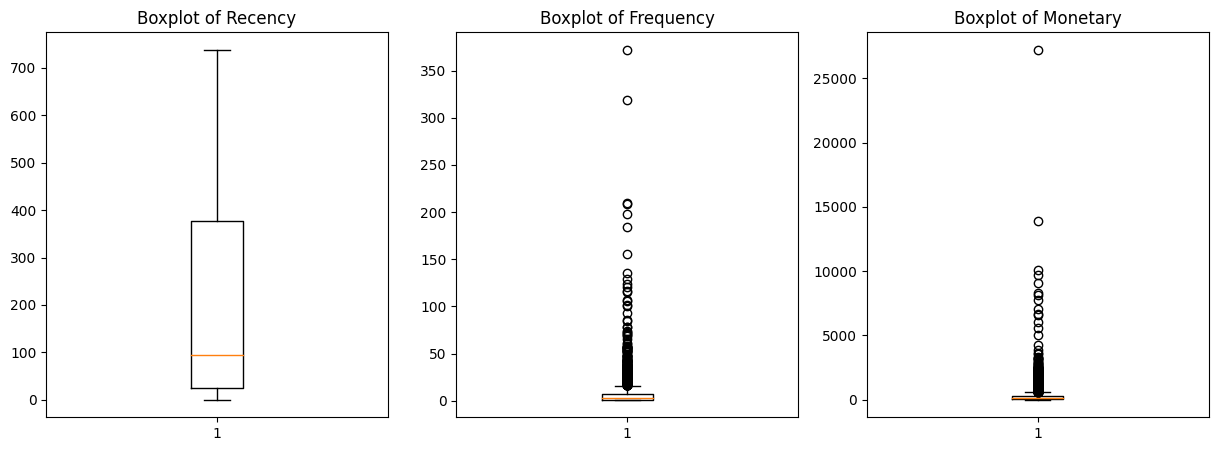

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(rfm['Recency'])
axes[0].set_title('Boxplot of Recency')

axes[1].boxplot(rfm['Frequency'])
axes[1].set_title('Boxplot of Frequency')

axes[2].boxplot(rfm['Monetary'])
axes[2].set_title('Boxplot of Monetary')


plt.show()


<Axes: xlabel='Recency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Monetary')

<Axes: xlabel='Frequency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Frequency vs Monetary')

<Axes: xlabel='Recency', ylabel='Frequency'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Frequency')

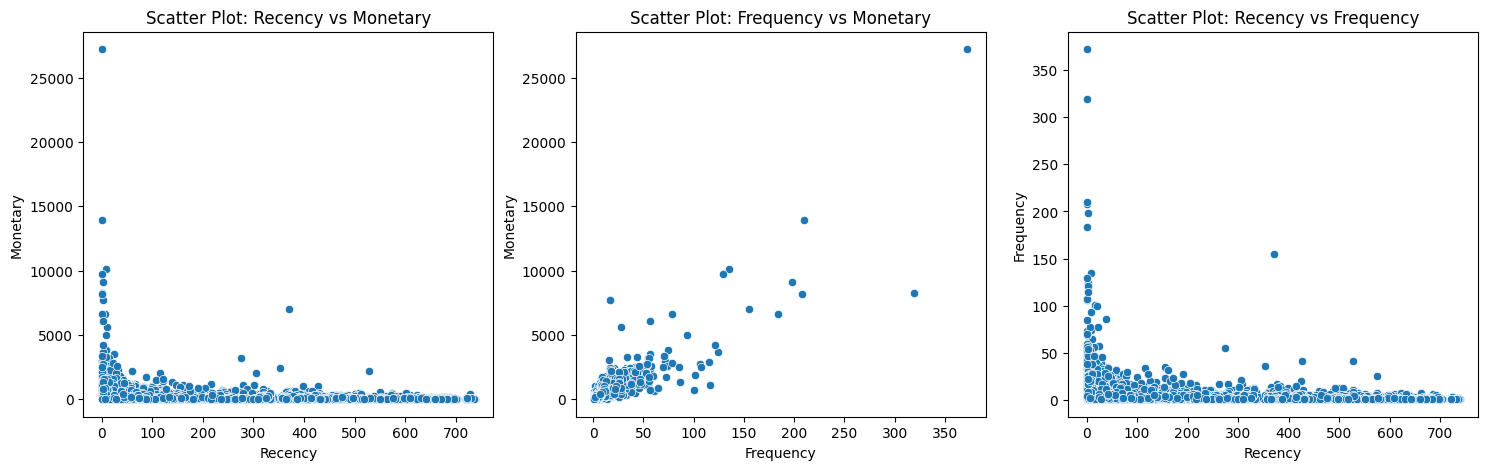

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjusting figure size for better spacing

# 1. Scatter Plot: Recency vs Monetary
sns.scatterplot(x='Recency', y='Monetary', data=rfm, ax=axes[0])
axes[0].set_title('Scatter Plot: Recency vs Monetary')

# 2. Scatter Plot: Frequency vs Monetary
sns.scatterplot(x='Frequency', y='Monetary', data=rfm, ax=axes[1])
axes[1].set_title('Scatter Plot: Frequency vs Monetary')

# 3. Scatter Plot: Recency vs Frequency
sns.scatterplot(x='Recency', y='Frequency', data=rfm, ax=axes[2])
axes[2].set_title('Scatter Plot: Recency vs Frequency')

plt.show()

**After Removing traditional outliers from the raw data and Creating RFMPT matrix still I can see some outliers, hence Im gonna remove those outliers**

In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = rfm[['Recency', 'Frequency', 'Monetary']].quantile(0.25)
Q3 = rfm[['Recency', 'Frequency', 'Monetary']].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame, keeping only values within the bounds
rfm_cleaned = rfm[
    (rfm['Recency'] >= lower_bound['Recency']) & (rfm['Recency'] <= upper_bound['Recency']) &
    (rfm['Frequency'] >= lower_bound['Frequency']) & (rfm['Frequency'] <= upper_bound['Frequency']) &
    (rfm['Monetary'] >= lower_bound['Monetary']) & (rfm['Monetary'] <= upper_bound['Monetary'])
]

# Show the result after outlier removal
rfm_cleaned.head()


,Customer ID,Recency,Frequency,Monetary
0,12346.0,528,11,60.496744
2,12348.0,74,5,66.327694
3,12349.0,18,3,420.597358
4,12350.0,309,1,37.431849
5,12351.0,374,1,42.069587


{'whiskers': [<matplotlib.lines.Line2D at 0x7937ca86d480>,
 'caps': [<matplotlib.lines.Line2D at 0x7937cc13e950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7937c0fc5ff0>],
 'medians': [<matplotlib.lines.Line2D at 0x7937d0a40250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7937d0a404f0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Recency')

{'whiskers': [<matplotlib.lines.Line2D at 0x7937d0a40ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7937d0a41000>,
 'boxes': [<matplotlib.lines.Line2D at 0x7937d0a40880>],
 'medians': [<matplotlib.lines.Line2D at 0x7937d0a41540>],
 'fliers': [<matplotlib.lines.Line2D at 0x7937d0a417e0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Frequency')

{'whiskers': [<matplotlib.lines.Line2D at 0x7937d0a41d80>,
 'caps': [<matplotlib.lines.Line2D at 0x7937d0a422c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7937d0a41ae0>],
 'medians': [<matplotlib.lines.Line2D at 0x7937d0a42800>],
 'fliers': [<matplotlib.lines.Line2D at 0x7937d0a42aa0>],
 'means': []}

Text(0.5, 1.0, 'Boxplot of Monetary')

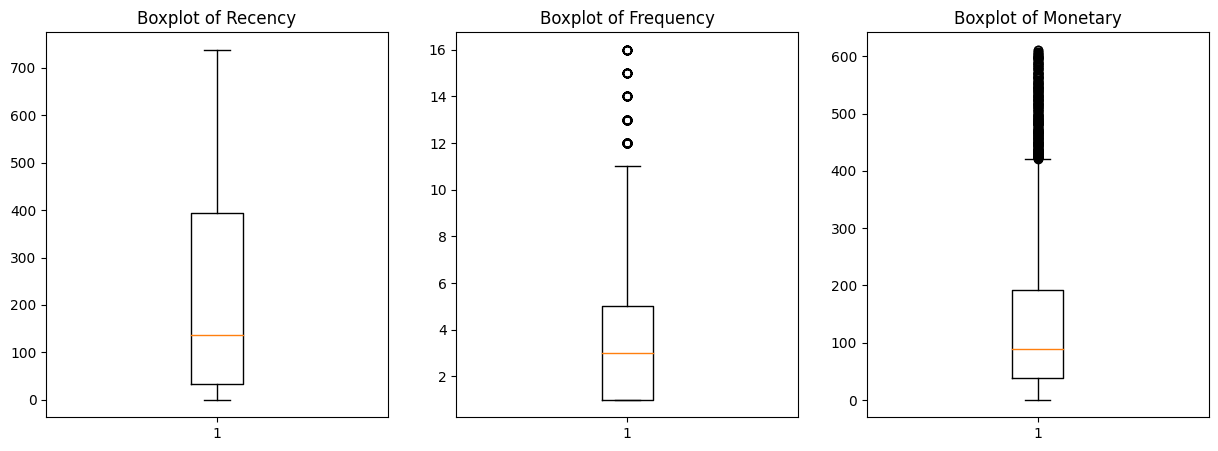

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(rfm_cleaned['Recency'])
axes[0].set_title('Boxplot of Recency')

axes[1].boxplot(rfm_cleaned['Frequency'])
axes[1].set_title('Boxplot of Frequency')

axes[2].boxplot(rfm_cleaned['Monetary'])
axes[2].set_title('Boxplot of Monetary')


plt.show()


<Axes: xlabel='Recency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Monetary')

<Axes: xlabel='Frequency', ylabel='Monetary'>

Text(0.5, 1.0, 'Scatter Plot: Frequency vs Monetary')

<Axes: xlabel='Recency', ylabel='Frequency'>

Text(0.5, 1.0, 'Scatter Plot: Recency vs Frequency')

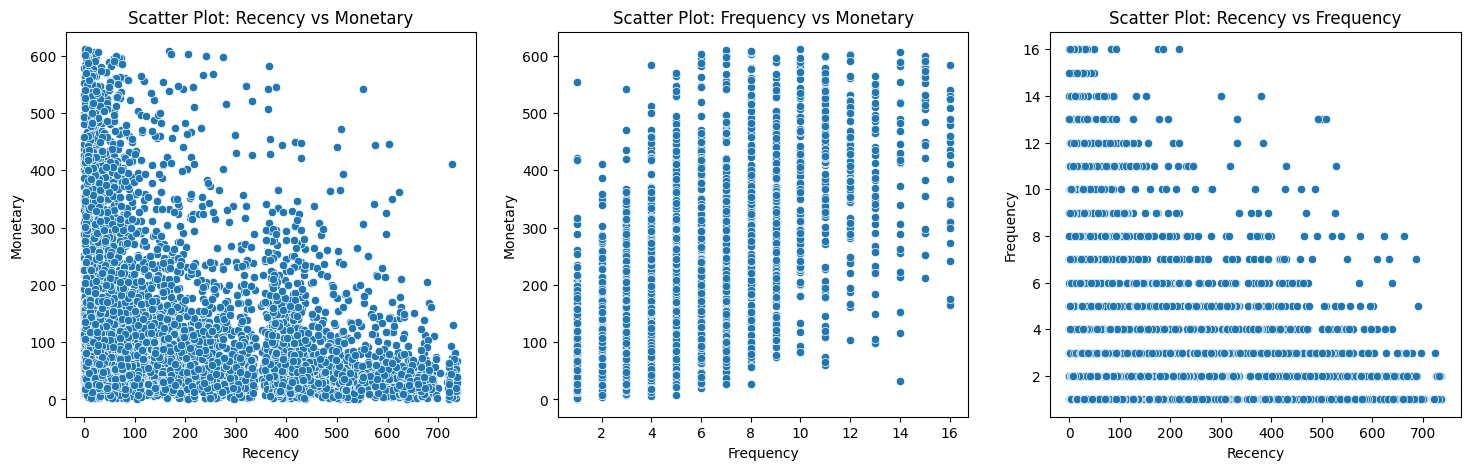

In [ ]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjusting figure size for better spacing

# 1. Scatter Plot: Recency vs Monetary
sns.scatterplot(x='Recency', y='Monetary', data=rfm_cleaned, ax=axes[0])
axes[0].set_title('Scatter Plot: Recency vs Monetary')

# 2. Scatter Plot: Frequency vs Monetary
sns.scatterplot(x='Frequency', y='Monetary', data=rfm_cleaned, ax=axes[1])
axes[1].set_title('Scatter Plot: Frequency vs Monetary')

# 3. Scatter Plot: Recency vs Frequency
sns.scatterplot(x='Recency', y='Frequency', data=rfm_cleaned, ax=axes[2])
axes[2].set_title('Scatter Plot: Recency vs Frequency')

plt.show()

**Data Scaling**

Here I am scaling the RFM and revenue metrics before clustering, as K-Means

In [ ]:
# Import the necessary libraries for scaling and clustering
from sklearn.preprocessing import StandardScaler

# Combine RFM and customer revenue data
customer_data = rfm_cleaned.merge(customer_revenue, on='Customer ID') #by default inner join

# Display the merged customer data
print('\n Combined RFM Matrix and Revenue of 1,3,6,12 and Lifetime')
customer_data.head()

# Select the features to scale (excluding 'CustomerID')
features_to_scale = customer_data.drop(columns=['Customer ID'])

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Create a DataFrame with the scaled features
scaled_customer_data = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Display the scaled data
print('\nDisplaying the scaled data')
scaled_customer_data.head()



 Combined RFM Matrix and Revenue of 1,3,6,12 and Lifetime


,Customer ID,Recency,Frequency,Monetary,LastMonthRevenue,ThreeMonthsRevenue,SixMonthsRevenue,TwelveMonthsRevenue,LifeTimeRevenue
0,12349.0,18,3,420.597358,173.344297,173.344297,173.344297,173.344297,420.597358
1,12356.0,22,6,371.526028,6.318529,6.318529,6.318529,167.997129,371.526028
2,12358.0,1,5,231.505416,25.943557,25.943557,62.812560,62.812560,231.505416
3,12362.0,2,10,611.590064,69.238157,388.310810,484.634890,611.590064,611.590064
4,12364.0,7,3,141.141236,36.821331,74.003377,141.141236,141.141236,141.141236



Displaying the scaled data


,Recency,Frequency,Monetary,LastMonthRevenue,ThreeMonthsRevenue,SixMonthsRevenue,TwelveMonthsRevenue,LifeTimeRevenue
0,0.500682,-0.660861,1.350742,2.861151,1.189777,0.756745,0.339824,1.350742
1,0.961701,0.130554,1.039286,-0.986225,-1.020341,-1.099372,0.291673,1.039286
2,-1.458652,-0.133251,0.150574,-0.534170,-0.760659,-0.471567,-0.655504,0.150574
3,-1.343398,1.185775,2.562974,0.463105,4.034255,4.216040,4.286188,2.562974
4,-0.767123,-0.660861,-0.422968,-0.283605,-0.124722,0.398880,0.049838,-0.422968


**K-Means Clustering**

Applying the Elbow Method to Determine the Optimal Number of Clusters

KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal Number of Clusters')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'WCSS')

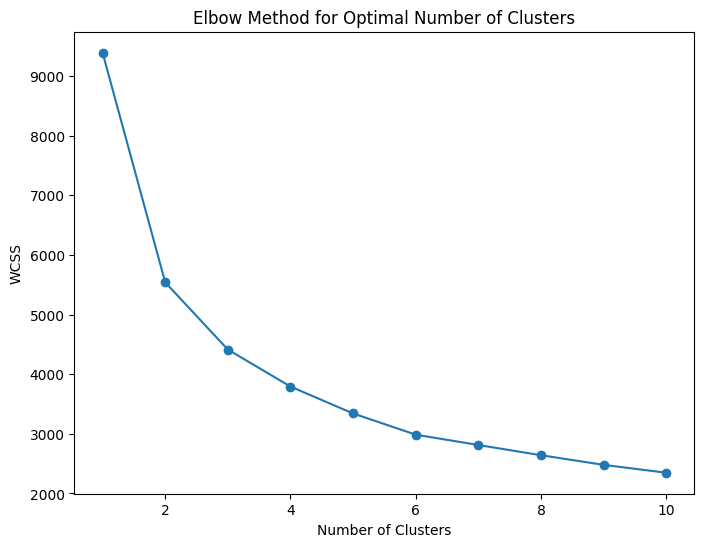

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_customer_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to observe the elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


**Apply K-Means with the Chosen Number of Clusters**

In [ ]:
# Based on the elbow method, choose the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the scaled data
kmeans.fit(scaled_customer_data)

# Add the cluster labels to the original customer data
customer_data['Cluster'] = kmeans.labels_

# Display the data with clusters
customer_data.head()

KMeans(n_clusters=3, random_state=42)

,Customer ID,Recency,Frequency,Monetary,LastMonthRevenue,ThreeMonthsRevenue,SixMonthsRevenue,TwelveMonthsRevenue,LifeTimeRevenue,Cluster
0,12349.0,18,3,420.597358,173.344297,173.344297,173.344297,173.344297,420.597358,1
1,12356.0,22,6,371.526028,6.318529,6.318529,6.318529,167.997129,371.526028,0
2,12358.0,1,5,231.505416,25.943557,25.943557,62.812560,62.812560,231.505416,2
3,12362.0,2,10,611.590064,69.238157,388.310810,484.634890,611.590064,611.590064,1
4,12364.0,7,3,141.141236,36.821331,74.003377,141.141236,141.141236,141.141236,2


In [ ]:
#Here I am dropping Cx column for clustering purpose
customer_data.drop(columns=['Customer ID'], inplace=True)

# Group customers by their K-Means cluster and calculate the mean values of the key metrics
cluster_profiles = customer_data.groupby('Cluster').mean()

# Reset index to see Cluster as a column
cluster_profiles = cluster_profiles.reset_index()

# Display the cluster profiles
cluster_profiles.head()


,Cluster,Recency,Frequency,Monetary,LastMonthRevenue,ThreeMonthsRevenue,SixMonthsRevenue,TwelveMonthsRevenue,LifeTimeRevenue
0,0,13.196721,9.210383,366.267718,53.400682,99.259375,139.653229,203.644022,366.267718
1,1,7.568182,6.852273,400.108765,141.351729,277.504713,328.754161,368.035739,400.108765
2,2,14.633333,3.456944,103.711368,35.693115,51.661534,60.440180,72.613001,103.711368


In [ ]:
# Assuming you have 3 clusters and mapping them to segment names
# Adjust the cluster mappings based on your cluster analysis
cluster_mapping = {
    0: 'Potential loyalist',  # Example: cluster 0 is High Value
    1: 'High Value',   # Example: cluster 1 is Low Value
    2: 'Low Value'      # Example: cluster 2 is At Risk
}

# Add a new column 'Segment' based on cluster mapping
customer_data['Segment'] = customer_data['Cluster'].map(cluster_mapping)

# Display the updated data with segment names
customer_data.head()


,Recency,Frequency,Monetary,LastMonthRevenue,ThreeMonthsRevenue,SixMonthsRevenue,TwelveMonthsRevenue,LifeTimeRevenue,Cluster,Segment,LongTermValue,ShortTermValue
0,18,3,420.597358,173.344297,173.344297,173.344297,173.344297,420.597358,1,High Value,767.285953,346.688595
1,22,6,371.526028,6.318529,6.318529,6.318529,167.997129,371.526028,0,Potential loyalist,545.841686,12.637058
2,1,5,231.505416,25.943557,25.943557,62.812560,62.812560,231.505416,2,Low Value,357.130536,51.887114
3,2,10,611.590064,69.238157,388.310810,484.634890,611.590064,611.590064,1,High Value,1707.815018,457.548968
4,7,3,141.141236,36.821331,74.003377,141.141236,141.141236,141.141236,2,Low Value,423.423709,110.824708


In [ ]:
# Explicitly define the correct order of segments
correct_order = ['Low Value', 'Potential loyalist', 'High Value']

# Convert the 'Segment' column to a categorical type with the correct order
customer_data['Segment'] = pd.Categorical(customer_data['Segment'], categories=correct_order, ordered=True)

# Aggregate RFMPT metrics by Segment
segment_summary = customer_data.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'LastMonthRevenue': 'mean',
    'ThreeMonthsRevenue': 'mean',
    'SixMonthsRevenue': 'mean',
    'TwelveMonthsRevenue': 'mean',
    'LifeTimeRevenue': 'mean'
}).reset_index()

# Display the segment summary
segment_summary


<ipython-input-88-f05f2e0efdb4>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = customer_data.groupby('Segment').agg({


,Segment,Recency,Frequency,Monetary,LastMonthRevenue,ThreeMonthsRevenue,SixMonthsRevenue,TwelveMonthsRevenue,LifeTimeRevenue
0,Low Value,14.633333,3.456944,103.711368,35.693115,51.661534,60.440180,72.613001,103.711368
1,Potential loyalist,13.196721,9.210383,366.267718,53.400682,99.259375,139.653229,203.644022,366.267718
2,High Value,7.568182,6.852273,400.108765,141.351729,277.504713,328.754161,368.035739,400.108765


In [ ]:
# Filter High Value customers
high_value_customers = customer_data[customer_data['Segment'] == 'High Value']
print(high_value_customers['Recency'].describe())

count    88.000000
mean      7.568182
std       7.447588
min       0.000000
25%       1.000000
50%       6.000000
75%      11.500000
max      27.000000
Name: Recency, dtype: float64


<Figure size 800x600 with 0 Axes>

<ipython-input-90-e3637d3b1df8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=customer_data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

<Axes: xlabel='Segment', ylabel='count'>

Text(0.5, 1.0, 'Number of Customers present in each K-Means Cluster')

Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Number of Customers')

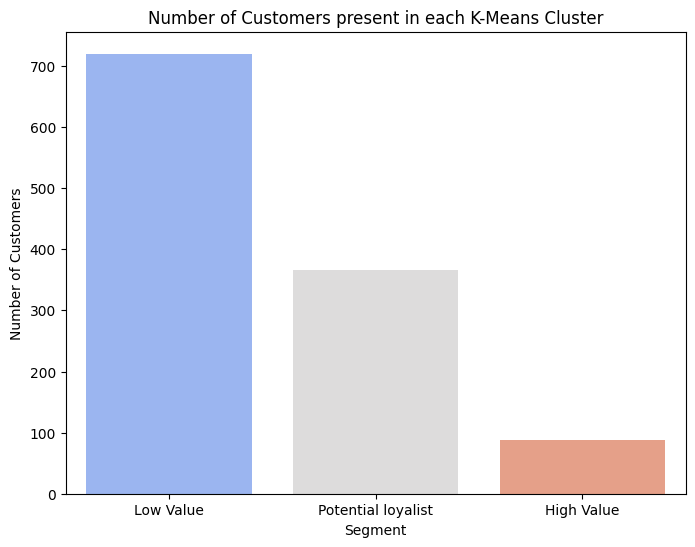

In [ ]:
# Bar plot to visualize the number of customers in each segment
plt.figure(figsize=(8, 6))
sns.countplot(x='Segment', data=customer_data, palette='coolwarm')
plt.title('Number of Customers present in each K-Means Cluster')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

Best Value Customers: These customers likely belong to the cluster with the highest LifeTimeRevenue, Monetary, and Frequency. They are consistent repeat buyers.

At Risk Customers: These customers might have relatively high Monetary and LifeTimeRevenue but exhibit higher Recency (meaning they haven't purchased recently), so they might be at risk of churn.

Low Value Customers: These customers have low Monetary, LifeTimeRevenue, and Frequency. They may have made one or two purchases and may not contribute significantly to revenue.

<ipython-input-93-adc78bdaf133>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kmeans_cluster_data = customer_data.groupby('Segment')[rfm_columns].mean()


<Axes: xlabel='Segment'>

Text(0.5, 1.0, 'K-Means Clusters vs Revenue Terms')

Text(0.5, 0, 'K-Means Cluster')

Text(0, 0.5, 'Average Revenue Value')

(array([0, 1, 2]),
 [Text(0, 0, 'Low Value'),
  Text(1, 0, 'Potential loyalist'),
  Text(2, 0, 'High Value')])

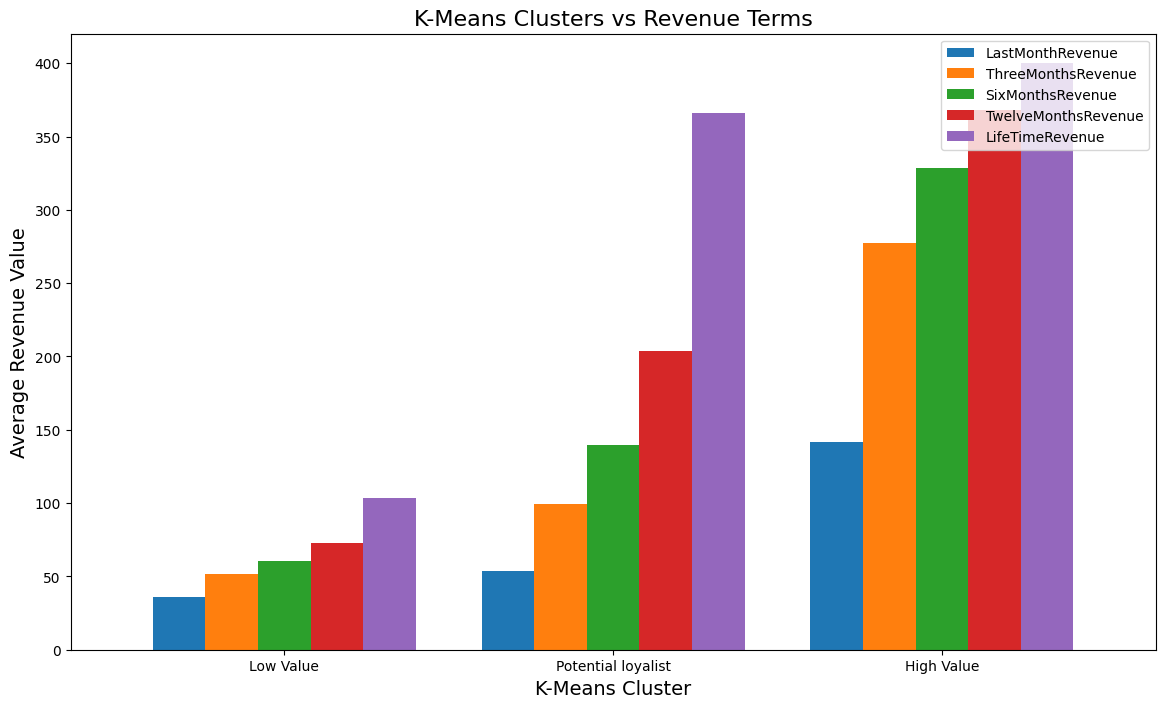

In [ ]:
# Group data by KMeans clusters and calculate the mean of RFMPT metrics
rfm_columns = ['LastMonthRevenue', 'ThreeMonthsRevenue', 'SixMonthsRevenue', 'TwelveMonthsRevenue', 'LifeTimeRevenue']
kmeans_cluster_data = customer_data.groupby('Segment')[rfm_columns].mean()

# Plot a bar chart for each RFMPT metric by KMeans clusters
kmeans_cluster_data.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('K-Means Clusters vs Revenue Terms', fontsize=16)
plt.xlabel('K-Means Cluster', fontsize=14)
plt.ylabel('Average Revenue Value', fontsize=14)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


**Here I have defined 2 Terms**

In [ ]:
# Define Long-Term Value (LTV) and Short-Term Value (STV)
customer_data['LongTermValue'] = customer_data['SixMonthsRevenue'] + customer_data['TwelveMonthsRevenue'] + customer_data['LifeTimeRevenue']
customer_data['ShortTermValue'] = customer_data['LastMonthRevenue'] + customer_data['ThreeMonthsRevenue']

# Display the data with LTV and STV
customer_data[['Segment', 'LongTermValue', 'ShortTermValue']].head()

,Segment,LongTermValue,ShortTermValue
0,High Value,767.285953,346.688595
1,Potential loyalist,545.841686,12.637058
2,Low Value,357.130536,51.887114
3,High Value,1707.815018,457.548968
4,Low Value,423.423709,110.824708


In [ ]:

# Now when you group, it will respect this order
value_summary = customer_data.groupby('Segment').agg({
    'LongTermValue': 'mean',
    'ShortTermValue': 'mean'
}).reset_index()

# Display the value summary to ensure correct order
value_summary.head()


<ipython-input-95-7fa524dfa2ac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_summary = customer_data.groupby('Segment').agg({


,Segment,LongTermValue,ShortTermValue
0,Low Value,236.764550,87.354649
1,Potential loyalist,709.564969,152.660057
2,High Value,1096.898666,418.856442


Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Average Value')

Text(0.5, 1.0, 'Long-Term Value vs Short-Term Value by Segment')

[Text(0, 0, 'Low Value'),
 Text(1, 0, 'Potential loyalist'),
 Text(2, 0, 'High Value')]

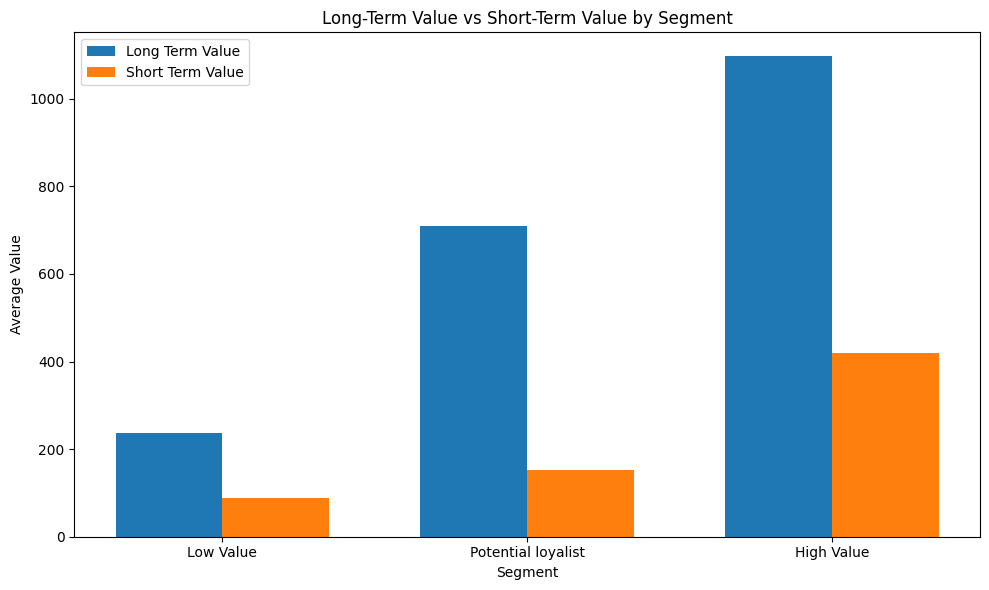

In [ ]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import numpy as np

# Set up bar plot parameters
x = np.arange(len(value_summary))  # the label locations
width = 0.35  # width of the bars

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for Long-Term Value and Short-Term Value
bars1 = ax.bar(x - width/2, value_summary['LongTermValue'], width, label='Long Term Value')
bars2 = ax.bar(x + width/2, value_summary['ShortTermValue'], width, label='Short Term Value')

# Add labels, title, and ticks
ax.set_xlabel('Segment')
ax.set_ylabel('Average Value')
ax.set_title('Long-Term Value vs Short-Term Value by Segment')
ax.set_xticks(x)
ax.set_xticklabels(value_summary['Segment'])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
